In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

t0 = time.time()

# 1. Installation `pyspark`

In [2]:
pip install pyspark

     |████████████████████████████████| 204.2 MB 23 kB/s s eta 0:00:01
     |████████████████████████████████| 198 kB 47.5 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612244 sha256=f0ff535134773c653a5dd64878e5b0573ed5c554bb94f38964c46663907017c4
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


#### Time-estimated

In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession
print('Installation takes %s seconds'%(time.time() - t0))

Installation takes 37.04466676712036 seconds


#### Build-in a spark-session

In [4]:
spark = SparkSession.builder \
                    .master("local") \
                    .appName("Word Count") \
                    .config("spark.some.config.option", "some-value") \
                    .getOrCreate()
spark

In [5]:
sc = spark.sparkContext
sqlContext = SQLContext(sc)

#### Loading `csv.file` with `pandas`

In [6]:
path_file = r'../input/big-data-vers-1/visiting.csv'
vst_df = pd.read_csv(path_file)
vst_df.head()

,utc_timestamp,local_timestamp,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,naics_code,brands,zip_code,minimum_dwell,safegraph_place_id,geohash_5,census_block_group
0,1598441109,1598415909,354cec9d-eb94-4522-bc35-dc14e9d910b2,idfa,Sandrock Canyon Os Park,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,sandrock canyon os park,san diego,ca,712190.0,NaN,92108.0,202.0,sg:2b7ce679bc5a4b8fb1d58a850bbacf76,9mudw,6.073009e+10
1,1598400002,1598385602,20e1e1d5-0642-4fe1-9718-94decebe2b3f,aaid,home,NaN,NaN,NaN,NaN,ohio,NaN,NaN,44090.0,1328.0,home,dpmd6,3.909309e+11
2,1598410516,1598392516,dc7dece9-4d17-4fa5-9290-6602830e0a0c,aaid,home,NaN,NaN,NaN,palatine,illinois,NaN,NaN,60067.0,476.0,home,dp3rs,1.703180e+11
3,1598467918,1598453518,a644d089-1227-4d8e-9127-35ed1b04ed1f,aaid,A Moment In Time Photo Booths,"Other Professional, Scientific, and Technical ...","Photography Studios, Portrait",360 mcclellan ave,hamilton,nj,541921.0,NaN,8610.0,4.0,sg:ff78dda4533e4da992b257b94c04b4af,dr4ue,3.402100e+11
4,1598465770,1598440570,4f7418d9-578c-4f03-b1fb-5e8f63bf2599,aaid,QFC (Quality Food Centers),Grocery Stores,Supermarkets and Other Grocery (except Conveni...,22803 44th ave w,mountlake terrace,wa,445110.0,QFC (Quality Food Centers),98043.0,18.0,sg:0096ae4959f849a186471eb96aef0cbf,c23pc,5.306105e+11


#### Loading `csv.data` to `spark` & viewing by `pandas`

In [7]:
visiting_df = spark.read.format("csv").option("header", "true").load(path_file)
visiting_df.toPandas().head()

,utc_timestamp,local_timestamp,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,naics_code,brands,zip_code,minimum_dwell,safegraph_place_id,geohash_5,census_block_group
0,1598441109,1598415909,354cec9d-eb94-4522-bc35-dc14e9d910b2,idfa,Sandrock Canyon Os Park,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,sandrock canyon os park,san diego,ca,712190,None,92108,202.0,sg:2b7ce679bc5a4b8fb1d58a850bbacf76,9mudw,060730093012
1,1598400002,1598385602,20e1e1d5-0642-4fe1-9718-94decebe2b3f,aaid,home,null,null,null,null,ohio,null,None,44090,1328.0,home,dpmd6,390930941004
2,1598410516,1598392516,dc7dece9-4d17-4fa5-9290-6602830e0a0c,aaid,home,null,null,null,palatine,illinois,null,None,60067,476.0,home,dp3rs,170318036103
3,1598467918,1598453518,a644d089-1227-4d8e-9127-35ed1b04ed1f,aaid,A Moment In Time Photo Booths,"Other Professional, Scientific, and Technical ...","Photography Studios, Portrait",360 mcclellan ave,hamilton,nj,541921,None,08610,4.0,sg:ff78dda4533e4da992b257b94c04b4af,dr4ue,340210025004
4,1598465770,1598440570,4f7418d9-578c-4f03-b1fb-5e8f63bf2599,aaid,QFC (Quality Food Centers),Grocery Stores,Supermarkets and Other Grocery (except Conveni...,22803 44th ave w,mountlake terrace,wa,445110,QFC (Quality Food Centers),98043,18.0,sg:0096ae4959f849a186471eb96aef0cbf,c23pc,530610513003


#### Register the `loaded-dataframe` as table in `SQL`

In [8]:
t0 = time.time()
SQLContext.registerDataFrameAsTable(sc, df = visiting_df, tableName = 'visiting')
print('Attach table "movement" takes %s seconds'%(time.time() - t0))

Attach table "movement" takes 0.21242666244506836 seconds


# 2. EDA.`table: visiting`
## 2.1 Descriptive-statistic information overview.

### 2.1.1. Column-types & counting values: `NA`, `unique`,

In [9]:
count = []
for col in vst_df.columns:
    count.append(len(vst_df[col].unique()))

basic_count = pd.DataFrame({'count_non_null': np.array(len(vst_df) - vst_df.isnull().sum().values), 
                              'NA_percentage(%)': np.round(100*vst_df.isnull().sum().values / len(vst_df), 2),
                             'dtypes': vst_df.dtypes,
                             'count_distinct': count},
                             index = vst_df.columns)
basic_count

,count_non_null,NA_percentage(%),dtypes,count_distinct
utc_timestamp,1000000,0.00,int64,133800
local_timestamp,1000000,0.00,int64,142424
ad_id,1000000,0.00,object,346495
id_type,1000000,0.00,object,2
location_name,1000000,0.00,object,164723
top_category,471806,52.82,object,161
sub_category,470750,52.92,object,308
street_address,472595,52.74,object,303198
city,816793,18.32,object,16772
state,957381,4.26,object,114


### 2.1.2. Statistically-descripted information
#### For the numeric data-types

In [10]:
vst_df.describe()

,utc_timestamp,local_timestamp,naics_code,zip_code,minimum_dwell,census_block_group
count,1.000000e+06,1.000000e+06,471813.000000,957205.000000,1000000.000000,9.573810e+05
mean,1.598453e+09,1.598435e+09,594339.698739,50779.896790,316.613161,2.848765e+11
std,4.217852e+04,4.253634e+04,144305.168279,27241.714194,407.024610,1.602608e+11
min,1.598400e+09,1.598363e+09,3231.000000,0.000000,0.000000,1.001020e+10
25%,1.598407e+09,1.598390e+09,447110.000000,30067.000000,20.000000,1.308902e+11
50%,1.598457e+09,1.598440e+09,711310.000000,47396.000000,101.000000,2.814995e+11
75%,1.598477e+09,1.598460e+09,722511.000000,75791.000000,552.000000,4.207701e+11
max,1.598573e+09,1.598608e+09,928120.000000,99929.000000,1440.000000,7.803096e+11


#### For the text-type; find the highest frequency

In [11]:
from collections import Counter 

## Filter the column_names which types be object
object_cols = vst_df.columns[vst_df.dtypes == 'object']

## Initialize list contain values & frequencies of the most_common_value at each column
val_most_common = []
count_most_common = []

## Loop over object-columns
for col in object_cols:
    test_list = vst_df[col]
    test_list = Counter(test_list)
    val_most_common.append(test_list.most_common(1)[0][0])  
    count_most_common.append(test_list.most_common(1)[0][1])

## Viewing
test = pd.DataFrame({'value_most_common': val_most_common,
             'freq_most_common': count_most_common},
            index = object_cols).T

test

,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,brands,safegraph_place_id,geohash_5
value_most_common,e3f2e5ea-0ab7-43e1-90af-7ffc67adedd2,idfa,home,NaN,NaN,NaN,NaN,tx,NaN,home,NaN
freq_most_common,46,517531,484784,528194,529250,527405,183207,51689,783743,484784,42619


or you can viewing by this command!

In [12]:
visiting_df.toPandas().describe()

,utc_timestamp,local_timestamp,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,naics_code,brands,zip_code,minimum_dwell,safegraph_place_id,geohash_5,census_block_group
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,216267,1000000,1000000,1000000,1000000,1000000
unique,133800,142424,346495,2,164723,161,308,303199,16772,114,314,4105,25882,1441,319077,70859,169570
top,1598400002,1598385602,e3f2e5ea-0ab7-43e1-90af-7ffc67adedd2,idfa,home,null,null,null,null,tx,null,Walmart,null,5.0,home,null,null
freq,498,245,46,517531,484784,528194,529250,527403,183207,51689,528187,15150,42795,38362,484784,42619,42619


#### Wraping all up-together

In [13]:
def wrap_data(dataframe):
    count = []
    for col in dataframe.columns:
        count.append(len(vst_df[col].unique()))
    left_df = pd.DataFrame({'count_non_null': np.array(len(dataframe) - vst_df.isnull().sum().values), 
                                  'NA_percentage(%)': np.round(100*dataframe.isnull().sum().values / len(dataframe), 2),
                                 'dtypes': vst_df.dtypes,
                                 'count_distinct': count},
                                 index = dataframe.columns)
    mid_DF = []
    for col_type in ['object', 'datetime64[ns]']:
        object_cols = dataframe.columns[dataframe.dtypes == col_type]
        val_most_common = []
        count_most_common = []

        for col in object_cols:
            test_list = dataframe[col]
            test_list = Counter(test_list)
            val_most_common.append(test_list.most_common(1)[0][0])  
            count_most_common.append(test_list.most_common(1)[0][1])

        test = pd.DataFrame({'value_most_common': val_most_common,
                             'freq_most_common': count_most_common},
                            index = object_cols).T
        mid_DF.append(test)
    mid_df = mid_DF[0].join(mid_DF[1], how = 'outer')
    df = left_df.join(pd.concat([dataframe.describe().drop('count'),
                                 mid_df.fillna('null')]).fillna('no_info').T,
                      how = 'outer').T
    return df

In [14]:
wrap_data(vst_df)

,ad_id,brands,census_block_group,city,geohash_5,id_type,local_timestamp,location_name,minimum_dwell,naics_code,safegraph_place_id,state,street_address,sub_category,top_category,utc_timestamp,zip_code
count_non_null,1000000,216257,957381,816793,957381,1000000,1000000,1000000,1000000,471813,1000000,957381,472595,470750,471806,1000000,957205
NA_percentage(%),0,78.37,4.26,18.32,4.26,0,0,0,0,52.82,0,4.26,52.74,52.92,52.82,0,4.28
dtypes,object,object,float64,object,object,object,int64,object,float64,float64,object,object,object,object,object,int64,float64
count_distinct,346495,4105,169570,16772,70859,2,142424,164723,1441,314,319077,114,303198,308,161,133800,25882
mean,no_info,no_info,2.84876e+11,no_info,no_info,no_info,1.59844e+09,no_info,316.613,594340,no_info,no_info,no_info,no_info,no_info,1.59845e+09,50779.9
std,no_info,no_info,1.60261e+11,no_info,no_info,no_info,42536.3,no_info,407.025,144305,no_info,no_info,no_info,no_info,no_info,42178.5,27241.7
min,no_info,no_info,1.00102e+10,no_info,no_info,no_info,1.59836e+09,no_info,0,3231,no_info,no_info,no_info,no_info,no_info,1.5984e+09,0
25%,no_info,no_info,1.3089e+11,no_info,no_info,no_info,1.59839e+09,no_info,20,447110,no_info,no_info,no_info,no_info,no_info,1.59841e+09,30067
50%,no_info,no_info,2.815e+11,no_info,no_info,no_info,1.59844e+09,no_info,101,711310,no_info,no_info,no_info,no_info,no_info,1.59846e+09,47396
75%,no_info,no_info,4.2077e+11,no_info,no_info,no_info,1.59846e+09,no_info,552,722511,no_info,no_info,no_info,no_info,no_info,1.59848e+09,75791


## 2.2. Cleaning data
### 2.1. Fix structure error

### 2.1.1. Convert `utc_timestamp` & `local_timestamp` to `datetime`

In [15]:
import datetime
vst_df['utc_timestamp'] = vst_df['utc_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
vst_df['local_timestamp'] = vst_df['local_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
vst_df.head(2)

,utc_timestamp,local_timestamp,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,naics_code,brands,zip_code,minimum_dwell,safegraph_place_id,geohash_5,census_block_group
0,2020-08-26 11:25:09,2020-08-26 04:25:09,354cec9d-eb94-4522-bc35-dc14e9d910b2,idfa,Sandrock Canyon Os Park,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,sandrock canyon os park,san diego,ca,712190.0,NaN,92108.0,202.0,sg:2b7ce679bc5a4b8fb1d58a850bbacf76,9mudw,6.073009e+10
1,2020-08-26 00:00:02,2020-08-25 20:00:02,20e1e1d5-0642-4fe1-9718-94decebe2b3f,aaid,home,NaN,NaN,NaN,NaN,ohio,NaN,NaN,44090.0,1328.0,home,dpmd6,3.909309e+11


Verify

In [16]:
wrap_data(vst_df)

,ad_id,brands,census_block_group,city,geohash_5,id_type,local_timestamp,location_name,minimum_dwell,naics_code,safegraph_place_id,state,street_address,sub_category,top_category,utc_timestamp,zip_code
count_non_null,1000000,216257,957381,816793,957381,1000000,1000000,1000000,1000000,471813,1000000,957381,472595,470750,471806,1000000,957205
NA_percentage(%),0,78.37,4.26,18.32,4.26,0,0,0,0,52.82,0,4.26,52.74,52.92,52.82,0,4.28
dtypes,object,object,float64,object,object,object,datetime64[ns],object,float64,float64,object,object,object,object,object,datetime64[ns],float64
count_distinct,346495,4105,169570,16772,70859,2,142424,164723,1441,314,319077,114,303198,308,161,133800,25882
mean,no_info,no_info,2.84876e+11,no_info,no_info,no_info,no_info,no_info,316.613,594340,no_info,no_info,no_info,no_info,no_info,no_info,50779.9
std,no_info,no_info,1.60261e+11,no_info,no_info,no_info,no_info,no_info,407.025,144305,no_info,no_info,no_info,no_info,no_info,no_info,27241.7
min,no_info,no_info,1.00102e+10,no_info,no_info,no_info,no_info,no_info,0,3231,no_info,no_info,no_info,no_info,no_info,no_info,0
25%,no_info,no_info,1.3089e+11,no_info,no_info,no_info,no_info,no_info,20,447110,no_info,no_info,no_info,no_info,no_info,no_info,30067
50%,no_info,no_info,2.815e+11,no_info,no_info,no_info,no_info,no_info,101,711310,no_info,no_info,no_info,no_info,no_info,no_info,47396
75%,no_info,no_info,4.2077e+11,no_info,no_info,no_info,no_info,no_info,552,722511,no_info,no_info,no_info,no_info,no_info,no_info,75791


$\qquad \Rightarrow$ We have finished the converting-structure of `utc_timestamp` & `local_timestamp`, now we will look at the columns of `id`.

### 2.1.2. For `text-type`
#### (i). For `ad_id` and `id_type`

For all the `text-type-data` likes `ad_id, id_type, city, state, ...`, we must lowercase all of them.

In [17]:
obj_cols = vst_df.columns[vst_df.dtypes == 'object']
for col in obj_cols:
    vst_df[col] = vst_df[vst_df[col].notnull()][col].apply(lambda x: x.lower())

vst_df.head(2)

,utc_timestamp,local_timestamp,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,naics_code,brands,zip_code,minimum_dwell,safegraph_place_id,geohash_5,census_block_group
0,2020-08-26 11:25:09,2020-08-26 04:25:09,354cec9d-eb94-4522-bc35-dc14e9d910b2,idfa,sandrock canyon os park,"museums, historical sites, and similar institu...",nature parks and other similar institutions,sandrock canyon os park,san diego,ca,712190.0,NaN,92108.0,202.0,sg:2b7ce679bc5a4b8fb1d58a850bbacf76,9mudw,6.073009e+10
1,2020-08-26 00:00:02,2020-08-25 20:00:02,20e1e1d5-0642-4fe1-9718-94decebe2b3f,aaid,home,NaN,NaN,NaN,NaN,ohio,NaN,NaN,44090.0,1328.0,home,dpmd6,3.909309e+11


Now, checking the consitency of the column `id-type`.

In [18]:
vst_df.groupby('id_type').count()[['ad_id']]

,ad_id
id_type,
aaid,482469
idfa,517531


$\qquad \Rightarrow$ So the structure of the column `id_type` is consistent of 2 `groups: "aaid"` and `"idfa"` and there is nothing to fix the structure at this column. 

Next, we will verify the `ad_id`, [Reference](https://en.wikipedia.org/wiki/Ad-ID)

In [19]:
ad_id_df = pd.DataFrame({'ad_id': vst_df['ad_id']})
ad_id_df['len(ad_id)'] = vst_df['ad_id'].apply(lambda x: len(x))
ad_id_df['all_split_-?'] = vst_df['ad_id'].apply(lambda x: vst_df['ad_id'][1].count('-') == 4)
ad_id_df['len(term1)'] = vst_df['ad_id'].apply(lambda x: len(x.split('-')[0]))
ad_id_df['len(term2)'] = vst_df['ad_id'].apply(lambda x: len(x.split('-')[1]))
ad_id_df['len(term3)'] = vst_df['ad_id'].apply(lambda x: len(x.split('-')[2]))
ad_id_df['len(term4)'] = vst_df['ad_id'].apply(lambda x: len(x.split('-')[3]))
ad_id_df['len(term5)'] = vst_df['ad_id'].apply(lambda x: len(x.split('-')[4]))
ad_id_df.head()

,ad_id,len(ad_id),all_split_-?,len(term1),len(term2),len(term3),len(term4),len(term5)
0,354cec9d-eb94-4522-bc35-dc14e9d910b2,36,True,8,4,4,4,12
1,20e1e1d5-0642-4fe1-9718-94decebe2b3f,36,True,8,4,4,4,12
2,dc7dece9-4d17-4fa5-9290-6602830e0a0c,36,True,8,4,4,4,12
3,a644d089-1227-4d8e-9127-35ed1b04ed1f,36,True,8,4,4,4,12
4,4f7418d9-578c-4f03-b1fb-5e8f63bf2599,36,True,8,4,4,4,12


Now, checking this result.

In [20]:
ad_id_df.groupby(['len(ad_id)', 'all_split_-?', 'len(term1)',
                 'len(term2)', 'len(term3)', 'len(term4)', 'len(term5)']).count()

,,,,,,,ad_id
len(ad_id),all_split_-?,len(term1),len(term2),len(term3),len(term4),len(term5),
36,True,8,4,4,4,12,1000000


We only have one-level of `groupby-multi-groups`, hence all of `ad_id` has the same structure

$\qquad \Rightarrow$ So, there is nothing to fix the structure at this column.

#### (ii). For the `location_name` & `brands`

Remind that the `brands` has more than `75%` missing values, and we have seen many `non-null` values from `brands` is concided in `location_name`, so the next step for these columns is **checking the `identical-column` at `non-null` values**?

In [21]:
### Chọn ra 2 cột cần quan tâm để nhìn cho đỡ rối
loc_brand_df = vst_df[['location_name', 'brands']]

## Bỏ đi các dòng bị khuyết
loc_brand_df = loc_brand_df.dropna()

## Thêm cột kiểm tra 2 cột trước đó có trùng nhau theo dòng hay không?
loc_brand_df['is_concided'] = (loc_brand_df['brands'] == loc_brand_df['location_name'])

print('Number of observations after dropping the NA-values (at column: "brands") =', loc_brand_df.shape[0])
print('Number of concided-values at the first 2 columns: ', loc_brand_df['is_concided'].sum())
loc_brand_df.head()

Number of observations after dropping the NA-values (at column: "brands") = 216257
Number of concided-values at the first 2 columns:  211448


,location_name,brands,is_concided
4,qfc (quality food centers),qfc (quality food centers),True
5,hyatt regency,hyatt regency,True
7,hyatt regency,hyatt regency,True
27,domino's pizza,domino's pizza,True
30,safeway,safeway,True


So, there are `211448` values from `brands` is concided with in `location_name` at the `non-null` observations

In [22]:
print('Percentage of non-concided-values at the first 2 columns: %s (perc) with %s values'% 
          (np.round(100 - 100*loc_brand_df['is_concided'].sum()/loc_brand_df.shape[0], 2), 
           loc_brand_df.shape[0] - loc_brand_df['is_concided'].sum()) )
loc_brand_df[~loc_brand_df['is_concided']].head()

Percentage of non-concided-values at the first 2 columns: 2.22 (perc) with 4809 values


,location_name,brands,is_concided
272,hubler ford franklin,ford motor company,False
299,bmw northwest,bmw,False
593,fort myers mitsubishi,mitsubishi motors,False
624,garlyn shelton nissan,nissan,False
1368,bailey ford of plattsburgh,ford motor company,False


$\qquad \Rightarrow$ Hence, you can drop this `column (brands)` since there are more than `78%` missing-values and for the `non-null` there are `4809` values of `non-concided` is `0.4809%` over `1e6` observation at total.

In [23]:
vst_df = vst_df.drop(columns = ['brands'])
vst_df.head(2)

,utc_timestamp,local_timestamp,ad_id,id_type,location_name,top_category,sub_category,street_address,city,state,naics_code,zip_code,minimum_dwell,safegraph_place_id,geohash_5,census_block_group
0,2020-08-26 11:25:09,2020-08-26 04:25:09,354cec9d-eb94-4522-bc35-dc14e9d910b2,idfa,sandrock canyon os park,"museums, historical sites, and similar institu...",nature parks and other similar institutions,sandrock canyon os park,san diego,ca,712190.0,92108.0,202.0,sg:2b7ce679bc5a4b8fb1d58a850bbacf76,9mudw,6.073009e+10
1,2020-08-26 00:00:02,2020-08-25 20:00:02,20e1e1d5-0642-4fe1-9718-94decebe2b3f,aaid,home,NaN,NaN,NaN,NaN,ohio,NaN,44090.0,1328.0,home,dpmd6,3.909309e+11


#### (iii). For the `top_category` & `sub_category`
In these categories, we only correct the typos if needed necessary. And to do this, we firstly need to install the required package using the following command in our python environment.

In [69]:
pip install pyspellchecker 

     |████████████████████████████████| 1.9 MB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


#### Example.

In [95]:
from spellchecker import SpellChecker
t0 = time.time()
spell = SpellChecker()

misspelled = ['let', 'flaf' , 'us', 'os', 'museums', 'wlak','on','the','groun',
             'dropl;', 'notehing', 'herpe']
correct_w = []
for word in misspelled:
    # Get the one `most likely` answer
    correct_w.append(spell.correction(word))
print('Time processing = ', time.time() - t0, '(seconds) with number of word-processed = ', len(misspelled))
print('words after correcting :\n', correct_w)

Time processing =  0.6273596286773682 (seconds) with number of word-processed =  12
words after correcting :
 ['let', 'flat', 'us', 'os', 'museums', 'walk', 'on', 'the', 'group', 'drop', 'nothing', 'here']


Ta thấy rằng hạn chế của `spell.correction` ở đây là vấn đề thời gian xử lý; chỉ mới `12` từ nhưng đã tốn đến `0.62` giây.

Như vậy với `dataset` này có `1 triệu quan trắc` và `3 cột` thì phương pháp này là bất khả thi về thời gian, do đó ta sẽ tạo ra `dictionary` các từ sẽ thay thế dựa trên các giá trị duy nhất ở mỗi cột.

In [107]:
t0 = time.time()
dict_ = vst_df['top_category'].value_counts().index
for dic in dict_:
    vst_df['top_category'].replace(dic, spell.correction(dic))
vst_df
print('Time processing = ', time.time() - t0, '(seconds)')

AttributeError: 'Index' object has no attribute 'lower'

In [85]:
list_cols = ['location_name', 'top_category', 'sub_category']
for col in list_cols:
    vst_df[col] = vst_df[col].apply(lambda x: spell.correction(x))
vst_df.head()

KeyboardInterrupt: 

#### (iv). For `city` and `state`
In these columns, the structure of `state` must be in short, for example: `tx = texas, ca = california, ...`

In [25]:
query = spark.sql("""SELECT length(ad_id) AS len, ad_id
                     FROM visiting
                  """)
query.toPandas().groupby('len').count()

,ad_id
len,
36,1000000


#### 2.1.4.

In [26]:
sub_df = vst_df[['ad_id', 'id_type']]

### 2.2. Remove duplicate or irrelevant observation

### 2.3. Handling missing values

$\qquad \diamond$ We have 10 columns contain the missing values, such as 

$\qquad \qquad \bullet$ `"top_category"`, `"sub_category"`

### 2.4. Check the outlier.

## 3. Distribution.

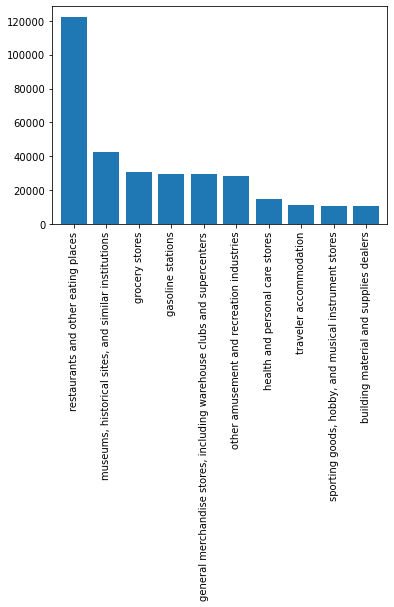

In [67]:
s = vst_df['top_category'].value_counts()
s.values.sum(), len(s)
s.head(10).plot.bar(width=.8)